# <font color=blue>**PROYECTO** - Modelos Predictivos de Regresión Lineal Uni-Variable Sencillos</font>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression as lm

In [2]:
#●	Usando sclicing con NumPy separar los datos en 2 datasets
PreciosCasas = np.load('proyecto_training_data.npy')
DatosEntrenamiento = PreciosCasas[0:int(PreciosCasas.shape[0]*.8)+1]
DatosValidacionPrueba = PreciosCasas[int(PreciosCasas.shape[0]*.8)+1:]
#print(DatosEntrenamiento)
#print(DatosValidacionPrueba.shape)

In [3]:
DatosEntrenamiento_dataframe = pd.DataFrame(DatosEntrenamiento,columns=['SalesPrice','OverallQual', '1stFlrSF', 'TotRmsAbvGrd', 'YearBuilt', 'LotFrontage'])
DatosEntrenamiento_dataframe

,SalesPrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
0,208500.0,7.0,856.0,8.0,2003.0,65.0
1,181500.0,6.0,1262.0,6.0,1976.0,80.0
2,223500.0,7.0,920.0,6.0,2001.0,68.0
3,140000.0,7.0,961.0,7.0,1915.0,60.0
4,250000.0,8.0,1145.0,9.0,2000.0,84.0
...,...,...,...,...,...,...
1164,194000.0,5.0,1432.0,5.0,1978.0,NaN
1165,233170.0,7.0,1502.0,7.0,2009.0,79.0
1166,245350.0,8.0,1694.0,7.0,2008.0,64.0
1167,173000.0,6.0,959.0,7.0,2000.0,58.0


## ●	Análisis exploratorio de datos

In [4]:
#○	Para cada variable en el dataset calcular((usando numpy o pandas):
#   ■	media
#   ■	valor máximo
#   ■	valor mínimo 
#   ■	rango(peak to peak, no el rango del tensor que por ser vector sabemos que es 1)
#   ■	desviación estándar 
AnalisisExploratorio = np.array([0,0,0,0,0,0])
for i in range(DatosEntrenamiento.shape[1]):
    VarMedia = np.mean(DatosEntrenamiento[i])
    VarMax = np.max(DatosEntrenamiento[i])
    VarMin = np.min(DatosEntrenamiento[i])
    VarPeak = np.ptp(DatosEntrenamiento[i])
    VarDesv = np.std(DatosEntrenamiento[i])
    
    #print('VARIABLE '+ str(i+1))
    #print('Media               ->' + str(VarMedia))
    #print('Max                 ->' + str(VarMax))
    #print('Min                 ->' + str(VarMin))
    #print('Rango               ->' + str(VarPeak))
    #print('Desviacion Estandar ->' + str(VarDesv))
    info = np.array([VarMedia,VarMax,VarMin,VarPeak,VarDesv,i+1])
    AnalisisExploratorio = np.vstack((AnalisisExploratorio, info))
    
AnalisisExploratorio_dataframe = pd.DataFrame(AnalisisExploratorio[1:],columns=['Media','Max', 'Min', 'Rango', 'Desviacion Estandar', 'Variable'])
AnalisisExploratorio_dataframe

,Media,Max,Min,Rango,Desviacion Estandar,Variable
0,35239.833333,208500.0,7.0,208493.0,77487.551648,1.0
1,30805.000000,181500.0,6.0,181494.0,67396.915783,2.0
2,37750.333333,223500.0,6.0,223494.0,83072.838631,3.0
3,23825.000000,140000.0,7.0,139993.0,51959.616842,4.0
4,42207.666667,250000.0,8.0,249992.0,92930.435877,5.0
5,24314.000000,143000.0,5.0,142995.0,53082.623277,6.0


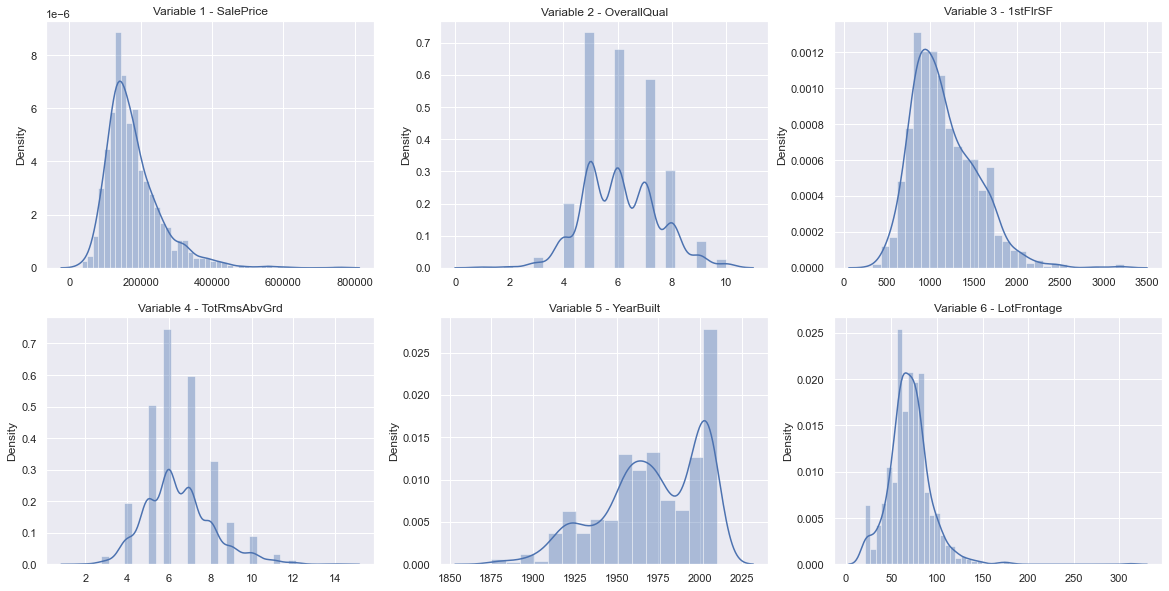

In [5]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
#○	Para cada variable en el dataset usar seaborn(función distplot https://seaborn.pydata.org/generated/seaborn.distplot.html)  
#para graficar  un histograma de la variable.
#%matplotlib inline

sns.set_theme();
fig, eje = plt.subplots(2, 3,figsize=(20, 10))
eje[0,0].set_title('Variable 1 - SalePrice')
sns.distplot(DatosEntrenamiento[:,0],ax=eje[0,0]) 
eje[0,1].set_title('Variable 2 - OverallQual')
sns.distplot(DatosEntrenamiento[:,1],ax=eje[0,1])
eje[0,2].set_title('Variable 3 - 1stFlrSF')
sns.distplot(DatosEntrenamiento[:,2],ax=eje[0,2])
eje[1,0].set_title('Variable 4 - TotRmsAbvGrd')
sns.distplot(DatosEntrenamiento[:,3],ax=eje[1,0])
eje[1,1].set_title('Variable 5 - YearBuilt')
sns.distplot(DatosEntrenamiento[:,4],ax=eje[1,1])
eje[1,2].set_title('Variable 6 - LotFrontage')
sns.distplot(DatosEntrenamiento[:,5],ax=eje[1,2])
plt.show()

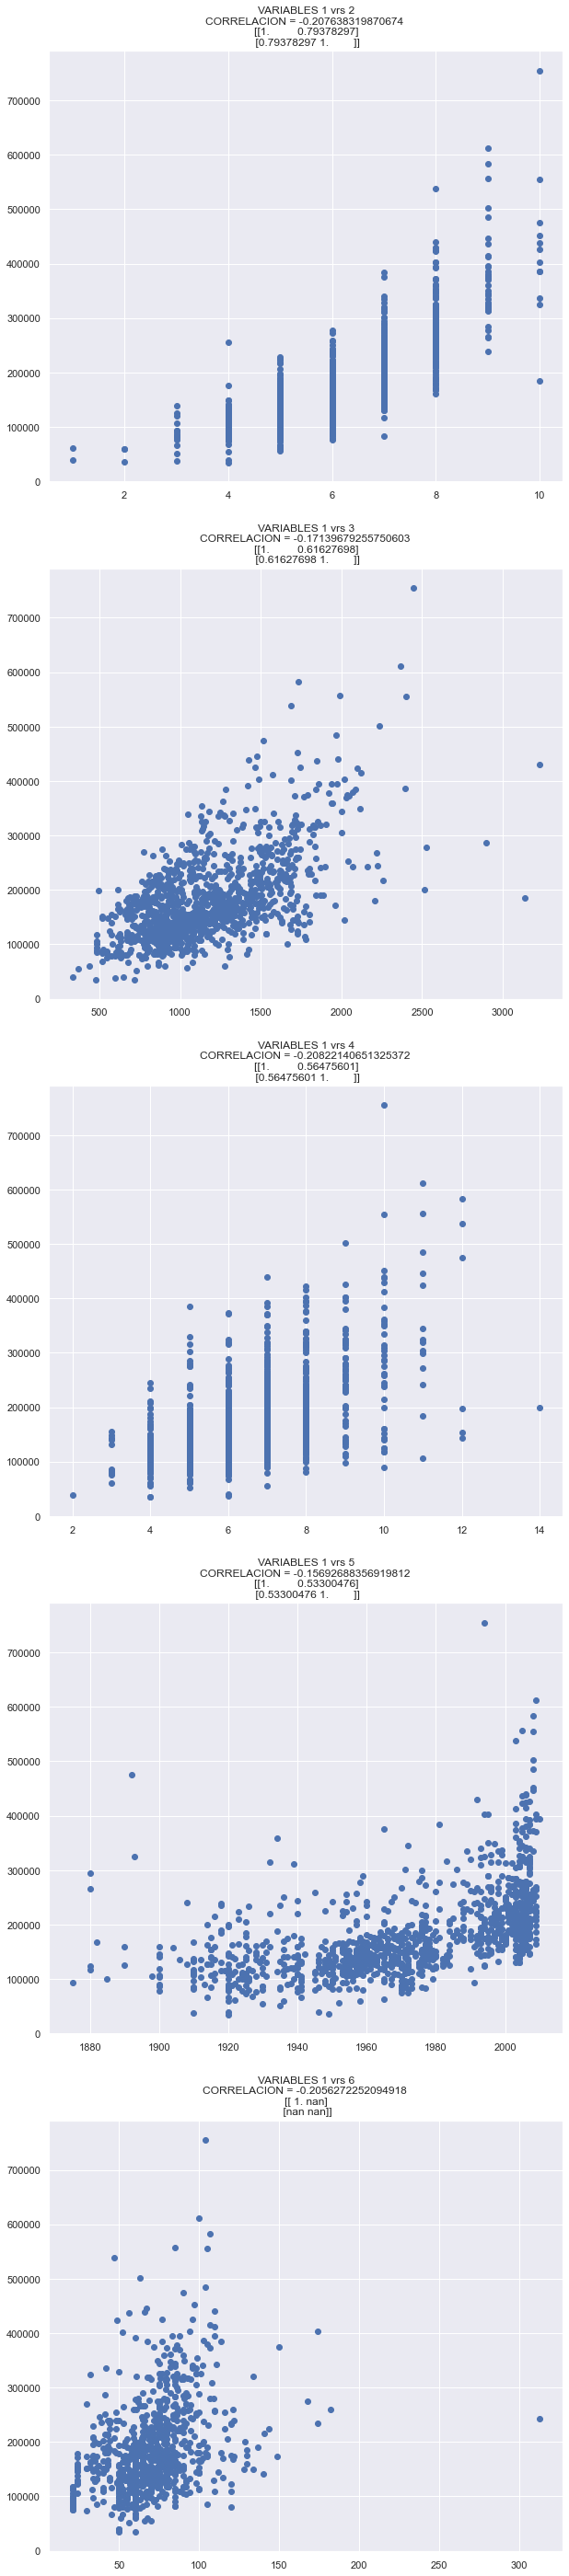

In [6]:
#●	Para cada variable independiente x :
#   ○	Calcular el coeficiente de correlación entre x y y
#   ○	graficar x vs y(scatterplot) usando matplotlib
#   ○	Colocar el coeficiente de correlación y colocarlo  como parte del título de la gráfica. 
#●	Basado en la gráfica y el coeficiente de correlación  de cada par x,y elegir  las 2 variables con más potencial predictivo (la 2 que presentan mayor correlación).

#Variable Y -> SalePrice
#Variables Independientes X -> OverallQual, 1stFlrSF, TotRmsAbvGrd, YearBuilt, LotFrontage

AE = AnalisisExploratorio[1:]
fig2, eje2 = plt.subplots(5, 1,figsize=(10, 50))

for i in range(1,DatosEntrenamiento.shape[1]):
    D1 = DatosEntrenamiento[:,0]
    D2 = DatosEntrenamiento[:,i]
    M1 = AE[0][0]
    M2 = AE[i][0]
    DS1 = AE[0][4]
    DS2 = AE[i][4]
    Covarianza = ((np.nansum(D1*D2)/DatosEntrenamiento[:,i].shape[0]) - (M1 * M2))
    R =Covarianza/(DS1 * DS2) #-> Calculo correlacion manual 
    CofCor = np.corrcoef(DatosEntrenamiento[:,0],DatosEntrenamiento[:,i]) #-> Calculo correlacion con np
       
    eje2[i-1].set_title('VARIABLES '+str(1) +' vrs '+str(i+1)+'\nCORRELACION = '+str(R) +' \n' + str(CofCor))
    eje2[i-1].scatter(DatosEntrenamiento[:,i],DatosEntrenamiento[:,0])    
plt.show()

In [7]:
#●	Crear una función para entrenar un modelo de regresión lineal de una variable 
#   y = mx +b.
#   La función recibe como argumentos:
#   ○	vector con  la variable independiente “x” ,  
#   ○	vector con la variable dependiente “y”,  
#   ○	un entero “epochs” que indica por cuantas iteraciones entrenar el modelo.
#   ○	un entero  “imprimir_error_cada”  , que nos indica cada cuantas iteraciones queremos imprimir a través de print : el número de iteración, el error del modelo en esa iteración, si imprimir_error_cada = 10, se despliega en pantalla el error en las iteraciones: 10,20,30,40,50
#   ○	escalar lr(learning rate): es usado como parte de la expresión matemática para actualizar en cada iteración los parámetros del modelo.

def ModeloRegresionLineal(VecX,VecY,epochs,imprimir_error_cada,learning_rate):

    Matriz1 = np.asmatrix(np.column_stack((VecX,np.ones_like(VecX))))
    Parametro_mb = np.array([[0],[0]])
    ErrorA = np.array([0])
    Modelo = {}
    cont = 1
    for i in range (epochs):
        Yhat = np.matmul(Matriz1,Parametro_mb)  
       
        m = np.vstack((Parametro_mb, Yhat))
        #Modelo[str(i+1)] = Parametro_mb
        Modelo[str(i+1)] = m

        VecY = np.reshape(VecY,(VecY.shape[0],1))
        ErrorYhat = np.average((np.power(VecY-Yhat,2)))*1/2
        ErrorA = np.vstack((ErrorA,np.array([ErrorYhat])))
        
        GradienteP = np.average(np.multiply((Yhat-VecY),Matriz1), axis=0)
        GradienteP = np.reshape(GradienteP,(GradienteP.shape[1],GradienteP.shape[0]))
        
        Parametro_mb = (Parametro_mb - GradienteP*learning_rate)
        
        if(cont==imprimir_error_cada):       
            print("ITERACION " + str(i+1))
            print("Error = ", ErrorYhat)
            cont=1
        else:
            cont+=1
            
    return(Modelo,ErrorA[1:])


In [8]:
#●	Crear una función que nos permita visualizar con matplotlib cómo cambia el error en el tiempo: crear una función que tome como parámetro el vector de errores generados por 
#   la función de entrenamiento y grafique en el eje “x” el número de iteración y en el eje “y”  el error para esa iteración:

def Error_Tiempo(Error):
    fig3, eje3 = plt.subplots(1,1,figsize=(20, 10))
    eje3.set_title("Cambio de el error en el tiempo")
    eje3.set(xlabel='Iteracion', ylabel='Error')
    eje3.plot(Error,'tab:orange')   
    plt.show()

In [9]:
#●	Crear una función que nos permita visualizar con matplotlib cómo evoluciona el modelo entrenado en el tiempo : 
#   Crear una función que tome como parámetro la estructura de datos conteniendo el historial de modelos ,y un valor “n” que indica cada cuantas iteraciones graficar el modelo resultante,  
#    por ejemplo para n=3 la función debe graficar la recta correspondiente al modelo junto a los datos cada 3 iteraciones, si se ejecutaron 15 iteraciones , 
#    para n = 3 se grafica el modelo de las iteraciones 3,6,9,12,15 junto con los datos de entrenamiento.

def EvolucionModelo(Modelo,n,VecX,VecY):
    iteracion = 1
    fig4, eje4 = plt.subplots(1,1,figsize=(20, 10))
    eje4.scatter(VecX,VecY,color='black')
    
    while iteracion <= len(Modelo.keys()):
        if iteracion % n == 0:
            Tupla =Modelo.get(str(iteracion))
            eje4.plot(VecX, Tupla[2:],label="iteracion=%d"%(iteracion,))
        iteracion+=1  
        
    leg = eje4.legend(loc='lower right', ncol=1, shadow=True, fancybox=True)
    leg.get_frame().set_alpha(0.5)
    plt.show()
    

ITERACION 1
Error =  21061.125
ITERACION 2
Error =  5542.5714866175
ITERACION 3
Error =  1792.1806675481128
ITERACION 4
Error =  885.8178756090729
ITERACION 5
Error =  666.7752396891116


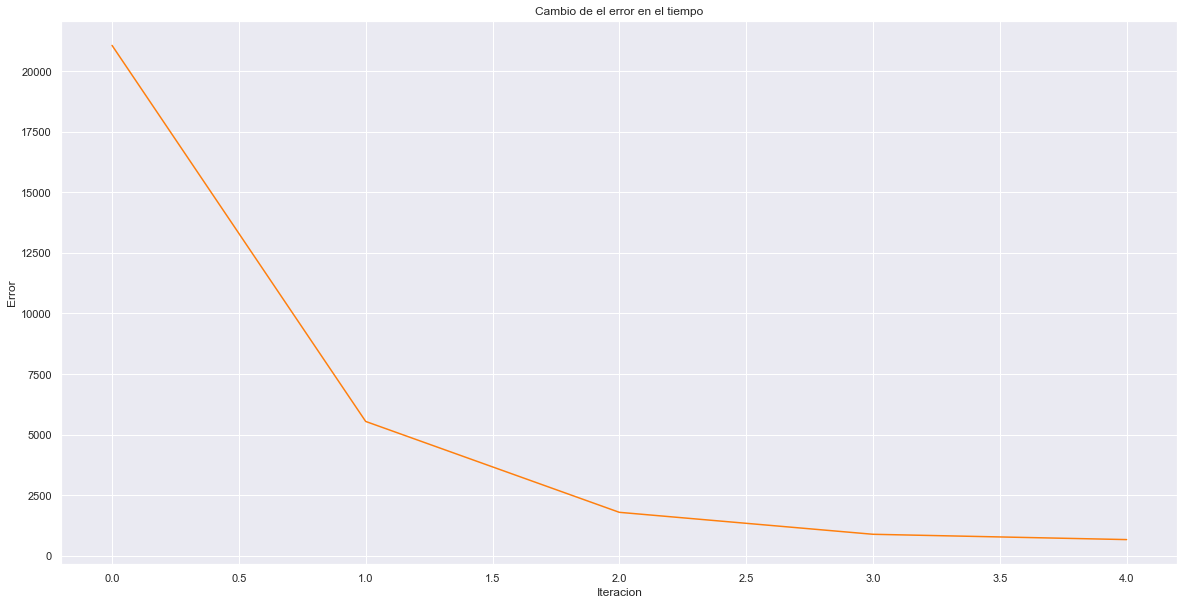

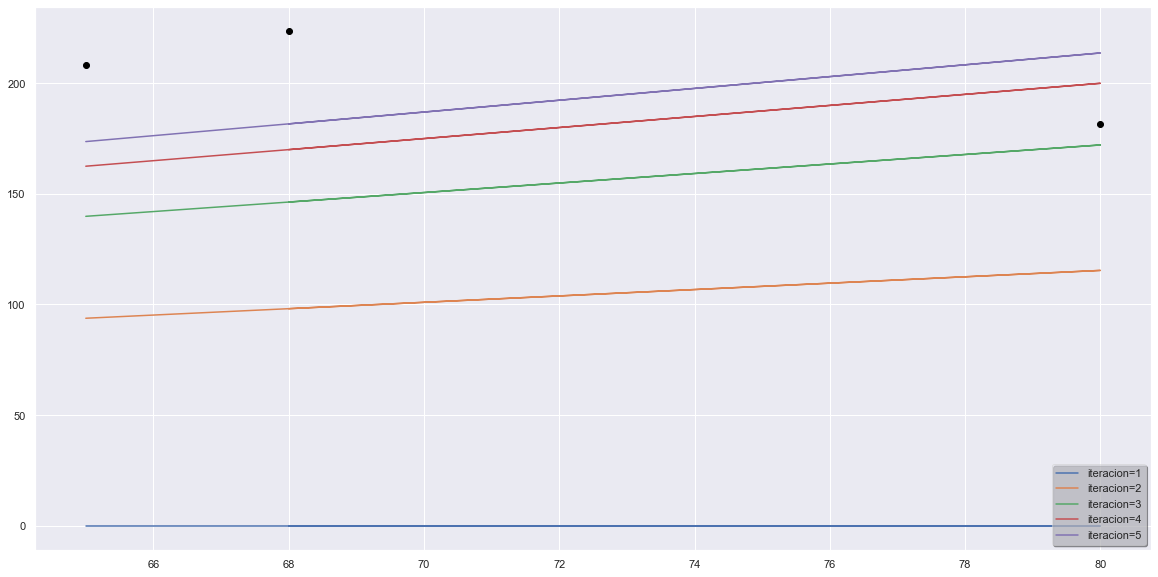

In [10]:
ResultadoModelo = ModeloRegresionLineal(np.array([65,80,68]),np.array([208.5,181.5,223.5]),5,1,0.0001)
Error_Tiempo(ResultadoModelo[1])
EvolucionModelo(ResultadoModelo[0],1,np.array([65,80,68]),np.array([208.5,181.5,223.5]))

ITERACION 100
Error =  9533098634.380217
ITERACION 200
Error =  5040207760.775417
ITERACION 300
Error =  3027355505.941928
ITERACION 400
Error =  2125510087.5986621
ITERACION 500
Error =  1721373191.957325
ITERACION 600
Error =  1540199684.0614696
ITERACION 700
Error =  1458909347.4421034
ITERACION 800
Error =  1422364755.5316377
ITERACION 900
Error =  1405865465.7772067
ITERACION 1000
Error =  1398346183.627084
ITERACION 1100
Error =  1394849882.7116
ITERACION 1200
Error =  1393155916.2135212
ITERACION 1300
Error =  1392269479.539983
ITERACION 1400
Error =  1391744920.410665
ITERACION 1500
Error =  1391382595.580054


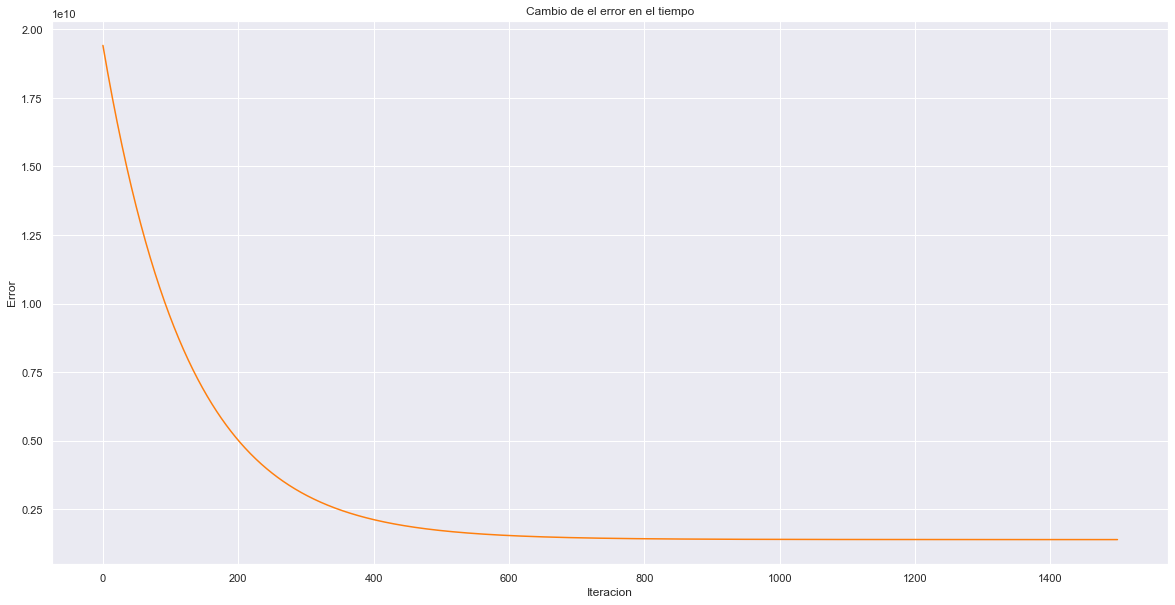

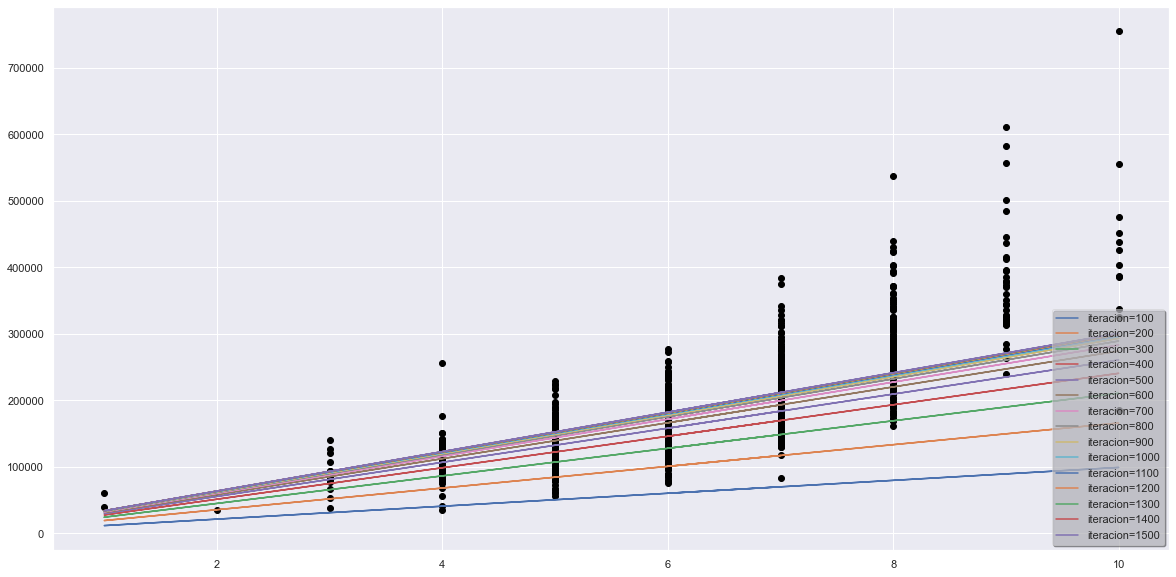

In [72]:
#●	Utilizar las funciones del punto anterior para entrenar modelos de regresión lineal y=mx +  b , para cada una de las variables “x” elegidas, 
#   basándose en las  funciones para graficar las curvas de aprendizaje  y comparación del modelo vs los datos 
#   elegir el número de “epochs” o iteraciones a entrenar el modelo(y experimentar con el learning _rate)
#   Criterio: El error debe disminuir lo más posible por lo cual la curva de aprendizaje debe disminuir hasta que ya no disminuya mucho (se estabilice o converja ) , 
#   si el error baja y comienza a subir debemos usar menos iteraciones.

#Variable X -> OverallQual
#Variable Y -> SalesPrice
EntrenarModelo1 = ModeloRegresionLineal(DatosEntrenamiento[:,1],DatosEntrenamiento[:,0],1500,100,0.0001)
Error_Tiempo(EntrenarModelo1[1])
EvolucionModelo(EntrenarModelo1[0],100,DatosEntrenamiento[:,1],DatosEntrenamiento[:,0])

#------  EPOCHS = 1000

ITERACION 100
Error =  3244669329.5043716
ITERACION 200
Error =  2184804983.63719
ITERACION 300
Error =  2117359781.680979
ITERACION 400
Error =  2113067206.0713084
ITERACION 500
Error =  2112793352.229866
ITERACION 600
Error =  2112775232.2392082


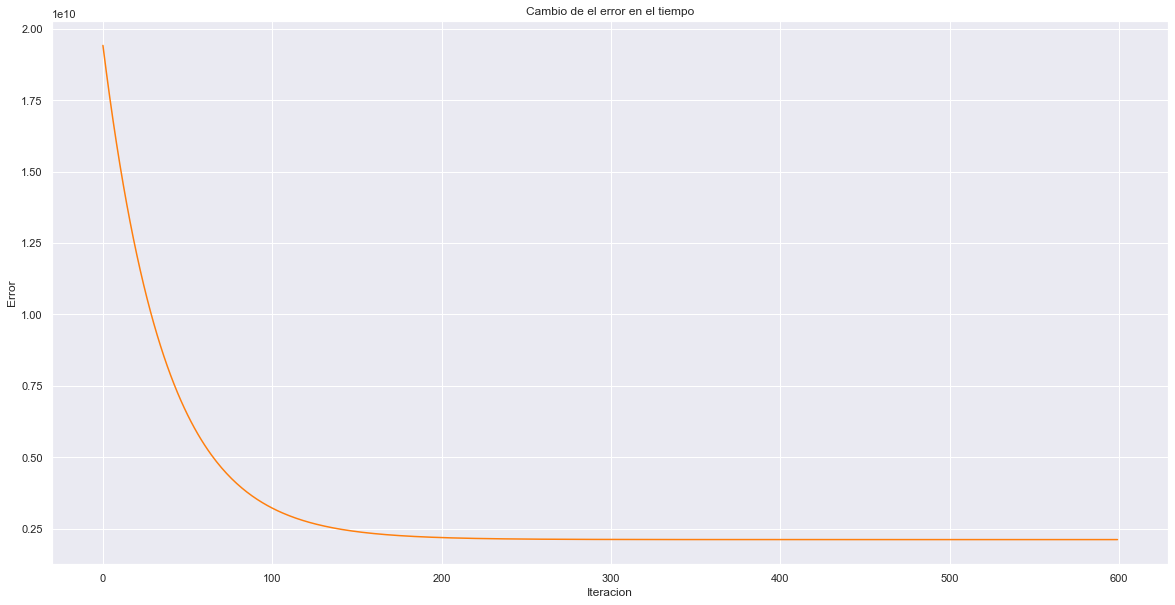

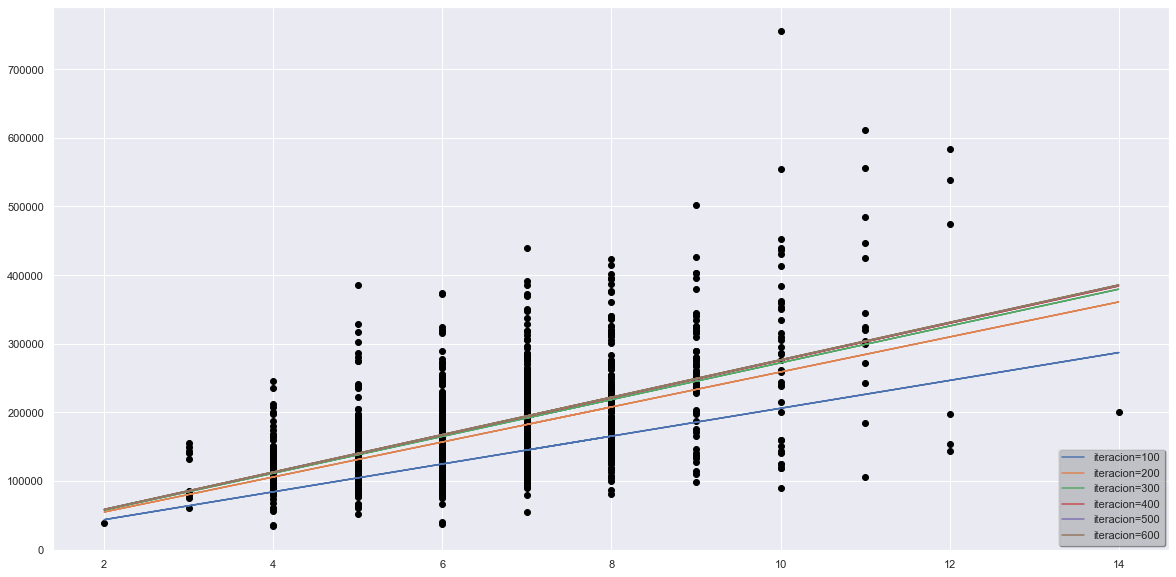

In [12]:
#Variable X -> TotRmsAbvGrd
#Variable Y -> SalesPrice
EntrenarModelo2 = ModeloRegresionLineal(DatosEntrenamiento[:,3],DatosEntrenamiento[:,0],600,100,0.0003)
Error_Tiempo(EntrenarModelo2[1])
EvolucionModelo(EntrenarModelo2[0],100,DatosEntrenamiento[:,3],DatosEntrenamiento[:,0])

#----- EPOCHS = 400

## ●	Análisis exploratorio de datos - Scikit-Learn

In [23]:
#●	Para cada una de las variables x seleccionadas, usar scikit-learn para entrenar un modelo de regresión lineal: 
#   https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

def EntrenarModeloScikitLearn(X, Y):
    EntrenarModeloS1 = linear_model.LinearRegression()
    
    return EntrenarModeloS1.fit(X,Y)


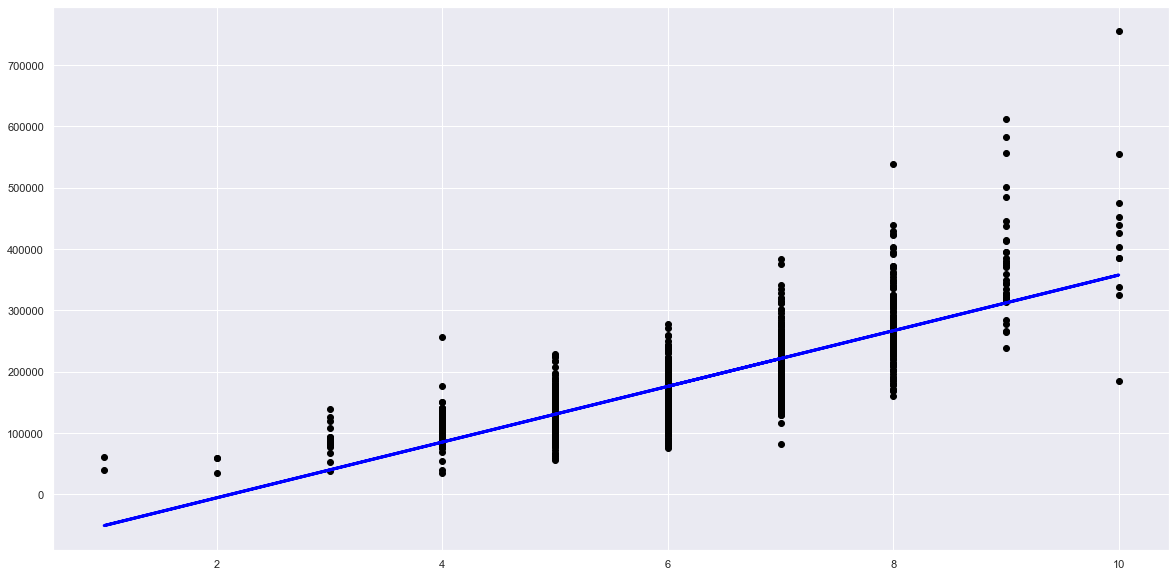

In [24]:
#Variable X -> OverallQual
#Variable Y -> SalesPrice
EntrenarModeloS1 = EntrenarModeloScikitLearn(np.transpose(DatosEntrenamiento[:,1].reshape(1,-1)),DatosEntrenamiento[:,0])
Pred_Y = EntrenarModeloS1.predict(np.transpose(DatosEntrenamiento[:,1].reshape(1,-1)))

fig5, eje5 = plt.subplots(1,1,figsize=(20, 10))
eje5.scatter(DatosEntrenamiento[:,1], DatosEntrenamiento[:,0],  color='black')
eje5.plot(DatosEntrenamiento[:,1], Pred_Y, color='blue', linewidth=3)

plt.show()

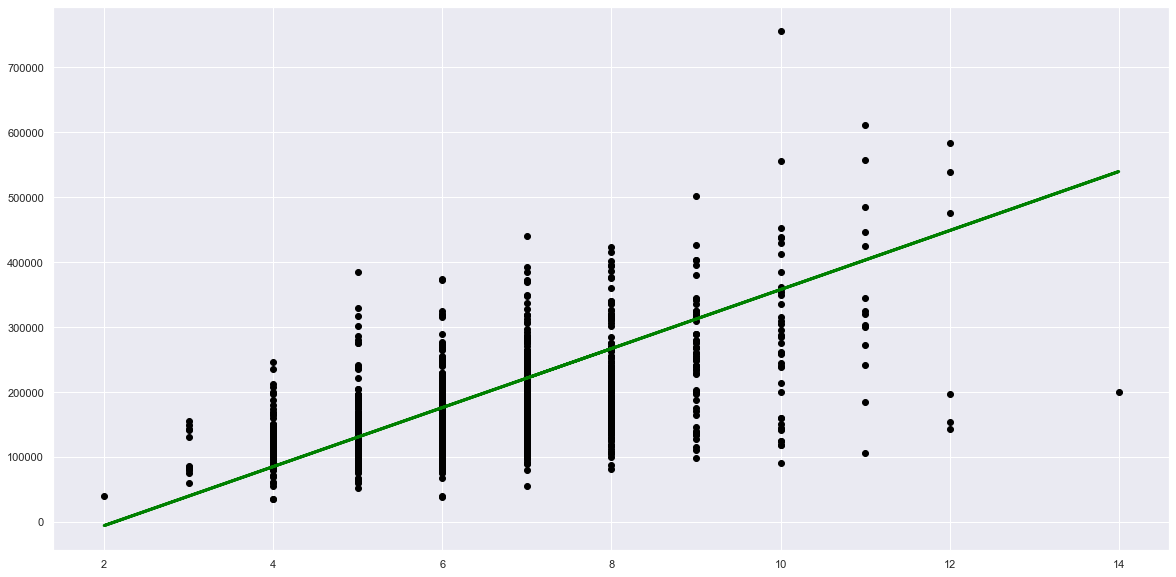

In [25]:
#Variable X -> TotRmsAbvGrd
#Variable Y -> SalesPrice
EntrenarModeloS2 = EntrenarModeloScikitLearn(np.transpose(DatosEntrenamiento[:,3].reshape(1,-1)),DatosEntrenamiento[:,0])
Pred_Y2 = EntrenarModeloS2.predict(np.transpose(DatosEntrenamiento[:,3].reshape(1,-1)))

fig6, eje6 = plt.subplots(1,1,figsize=(20, 10))
eje6.scatter(DatosEntrenamiento[:,3], DatosEntrenamiento[:,0],  color='black')
eje6.plot(DatosEntrenamiento[:,3], Pred_Y2, color='green', linewidth=3)

plt.show()

## ●	Predicción Estimada Promedio

In [16]:
#●	Para cada variable independiente x elegida, crear una función que usando el modelo entrenado manualmente y el modelo de scikit-learn(enviados como parámetros a la funcion) 
#   calcule la estimación o predicción de cada uno de estos y devuelva como resultado una predicción estimada promediando las predicciones de los 2  modelos, la función debe recibir 
#   como parámetro adicional un vector de cualquier tamaño de x  y devolver 3 vectores cada uno del mismo tamaño del vector x.
#     ○	La predicción con el modelo entrenado manualmente
#     ○	La predicción con el modelo de scikit-learn
#     ○	La combinación(promedio) de las 2 anteriores.

def PrediccionEstimadaPromedio(ModeloManual, ModeloScikit, VecX):
    PredModeloManual = np.array(np.transpose(ModeloManual.get(str(len(ModeloManual.keys())))[2:]))
    PredModeloScikit = ModeloScikit.predict(np.transpose(VecX.reshape(1,-1)))
    PredModeloProm   = (PredModeloManual+PredModeloScikit)/2
    
    return(PredModeloManual,PredModeloScikit,PredModeloProm )

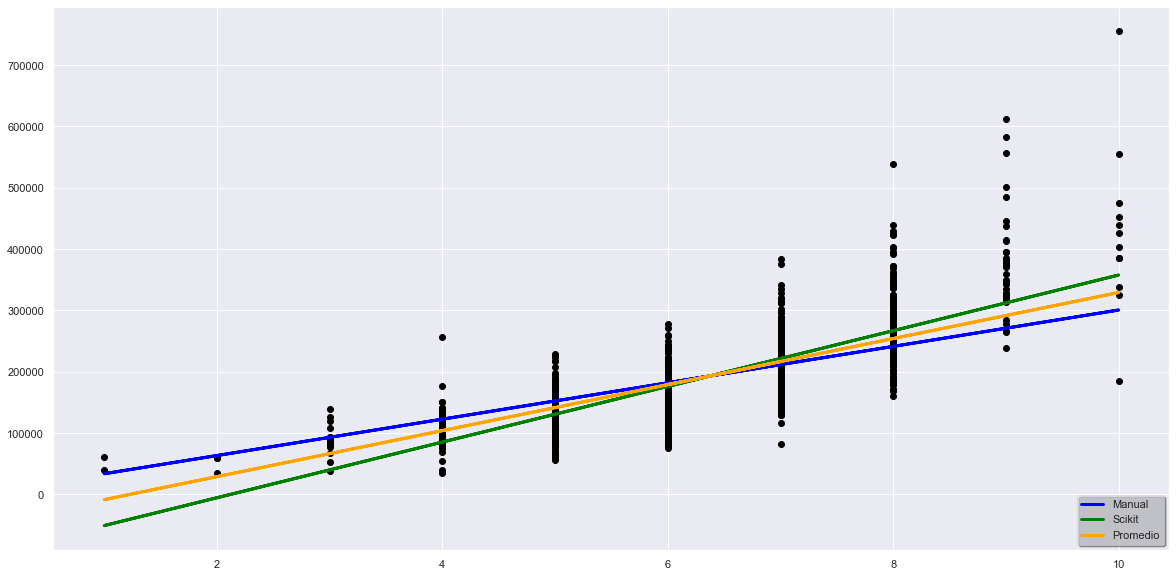

In [88]:
#Variable X -> OverallQual
#Variable Y -> SalesPrice

YPromedio1 = PrediccionEstimadaPromedio(EntrenarModelo1[0], EntrenarModeloS1, DatosEntrenamiento[:,1])

fig7, eje7 = plt.subplots(1,1,figsize=(20, 10))
eje7.scatter(DatosEntrenamiento[:,1], DatosEntrenamiento[:,0],  color='black')
eje7.plot(DatosEntrenamiento[:,1], YPromedio1[0][0,:], color='blue', linewidth=3, label= 'Manual')
eje7.plot(DatosEntrenamiento[:,1], YPromedio1[1], color='green', linewidth=3, label= 'Scikit')
eje7.plot(DatosEntrenamiento[:,1], YPromedio1[2][0,:], color='orange', linewidth=3, label= 'Promedio')

leg = eje7.legend(loc='lower right', ncol=1, shadow=True, fancybox=True)
leg.get_frame().set_alpha(0.5)

plt.show()

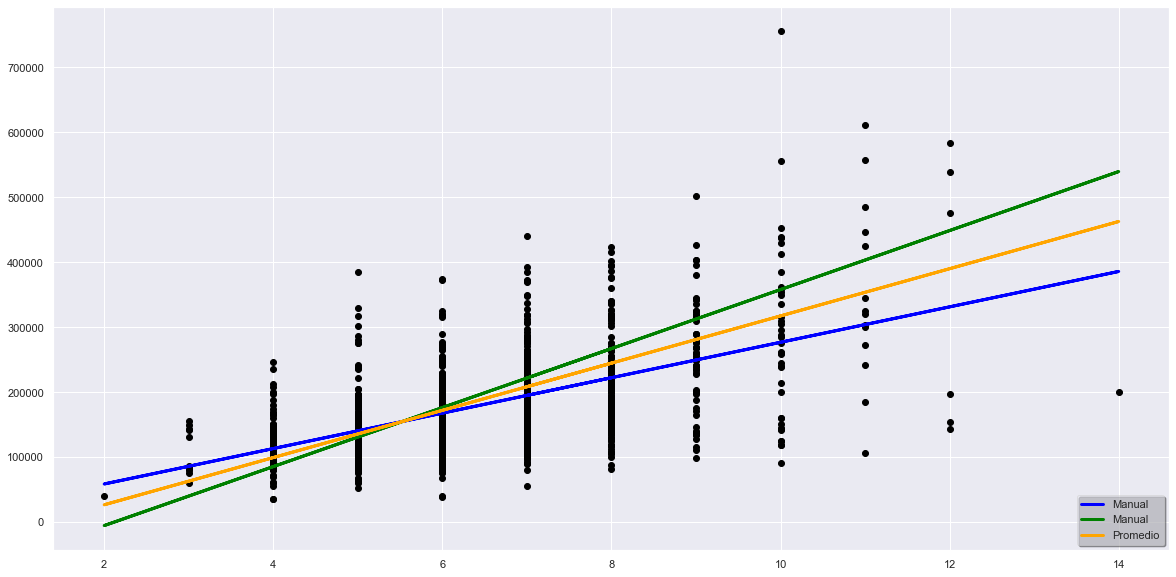

In [90]:
#Variable X -> TotRmsAbvGrd
#Variable Y -> SalesPrice
YPromedio2 = PrediccionEstimadaPromedio(EntrenarModelo2[0], EntrenarModeloS2,DatosEntrenamiento[:,3])

fig7, eje7 = plt.subplots(1,1,figsize=(20, 10))
eje7.scatter(DatosEntrenamiento[:,3], DatosEntrenamiento[:,0],  color='black')
eje7.plot(DatosEntrenamiento[:,3], YPromedio2[0][0,:], color='blue', linewidth=3, label= 'Manual')
eje7.plot(DatosEntrenamiento[:,3], YPromedio2[1], color='green', linewidth=3, label= 'Manual')
eje7.plot(DatosEntrenamiento[:,3], YPromedio2[2][0,:], color='orange', linewidth=3, label= 'Promedio')

leg = eje7.legend(loc='lower right', ncol=1, shadow=True, fancybox=True)
leg.get_frame().set_alpha(0.5)

plt.show()

## ●	Aplicacion de los modelos predictivos para estimar la variable dependiente

ITERACION 1000
Error =  9815491109.87454
[9.81549111e+09 2.62707720e+09]
[1.44911774e+10 7.84876078e+09]


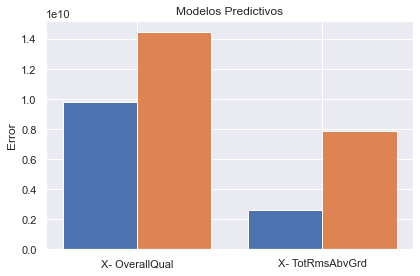

In [92]:
#●	Usando el 20% de los datos de validación, aplicamos los modelos predictivos para estimar la variable dependiente  y usando los valores reales de “y” calculamos el error de cada modelo.
#   Para cada variable independiente “x” elegida : 
#   ●	Graficar el  error de cada modelo para esta variable “x”
#   ●	Concluir cuál modelo para la  variable “x” es el mejor a ser usado (error mas bajo)

ErrorX1 = np.array([0])
ErrorX2 = np.array([0])

ModeloValidacion1 = ModeloRegresionLineal(DatosValidacionPrueba[:,1],DatosValidacionPrueba[:,0],1000,100,0.0001)
ModeloValidacion2 = ModeloRegresionLineal(DatosValidacionPrueba[:,3],DatosValidacionPrueba[:,0],400,100,0.0001)
ErrorX1 = ModeloValidacion1[1][-1]
ErrorX2 = ModeloValidacion2[1][-1]

ModeloSValidacion1 = EntrenarModeloScikitLearn(np.transpose(DatosValidacionPrueba[:,1].reshape(1,-1)),DatosValidacionPrueba[:,0])
PredV_Y1 = ModeloSValidacion1.predict(np.transpose(DatosValidacionPrueba[:,1].reshape(1,-1)))
a = mean_squared_error(DatosValidacionPrueba[:,0], PredV_Y1)
ErrorX1 = np.append(ErrorX1,np.array([a]))

ModeloSValidacion2 = EntrenarModeloScikitLearn(np.transpose(DatosValidacionPrueba[:,3].reshape(1,-1)),DatosValidacionPrueba[:,0])
PredV_Y2 = ModeloSValidacion2.predict(np.transpose(DatosValidacionPrueba[:,3].reshape(1,-1)))
b = mean_squared_error(DatosValidacionPrueba[:,0], PredV_Y2)
ErrorX2 = np.append(ErrorX2,np.array([b]))

print(ErrorX1)
print(ErrorX2)

#---------------------------------------------------------
ErrorLabes = ['X- OverallQual', 'X- TotRmsAbvGrd']
x = np.arange(len(ErrorLabes))  
width = 0.4  

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, ErrorX1, width)
rects2 = ax.bar(x + width/2, ErrorX2, width)

ax.set_ylabel('Error')
ax.set_title('Modelos Predictivos')
ax.set_xticks(x)
ax.set_xticklabels(ErrorLabes)
fig.tight_layout()
plt.show()

●	Concluir cuál modelo para la  variable “x” es el mejor a ser usado (error mas bajo)
- Basado en los resultados obtenidos en la grafica el modelo Manual debe ser usado ya que su error es mas bajo